In [67]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [68]:
players_url <- "https://raw.githubusercontent.com/paullevental/DSCI-100-project-data/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/paullevental/DSCI-100-project-data/main/sessions.csv"

players <- read_csv(players_url)
sessions <- read_csv(sessions_url)
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


# Players and Sessions Data overview


## Players

This dataset has 196 different observatitons and 7 total variables

- **experience:** `<chr>` 5 types of player experience Pro, Veteran, Amateur, Regular and beginner.
- **subscribe:** `<lgl>`   logical indicator of players subscription status.
- **hashedEmail:** `<chr>`   A hashed version of the player's email.
- **played_hours:** `<dbl>`   A numeric value representing the total hours the player has played
- **name:** `<chr>`   The Players name.
- **gender:** `<chr>`  The Players gender.
- **Age:**  `<dbl>` The Players age.
  
### Issues With Players Dataset
In the **Age** column there are (NA), missing values which need to be dealt with.


## Sessions

This dataset has 1535 differnt observatitons and 5 total variables.

- **hashedEmail:**  `<chr>`  A hashed version of the player's email.
- **start_time & end_time:** `<chr>` These columns record the start and end times of each session in a human-readable format. 
- **original_start_time & original_end_time:** `<dbl>`   Numeric columns (in double format) that likely represent the session times in milliseconds.


### Issues With Sessions Dataset
start_time and  end_time columns  are of type `<chr>` and the other ,whereas original_start_time and original_end_time are of type `<dbl>`. To fix this issue, we need to make it so that all 4 time columns are of the same type and format




# Question 
We will answer the following broad question:

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

The specific question is:

Can player factors such as time played, age and experience effectively predict the chance of subscribing to the newsletter?

By using columns: played_hours, age and experience from the players.csv dataset, we can predict a players subscription status.

Data wrangling will include handling missing values in `Age` column via imputation and we will convert our `experience` to a factor type preventing any innapropriate linear assumptions in our model. Additionally, the hashedEmail variable won't be of any use so we can also remove that as part of the wrangling process.

In [69]:
players <- players |>
            mutate(experience = as.factor(experience))

players <- players |>
            select(-hashedEmail)

players

experience,subscribe,played_hours,name,gender,Age
<fct>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,2.3,Harlow,Male,17
Pro,TRUE,0.2,Ahmed,Other,NA


### Mean Values

In [70]:
mean_values <- players |>
        summarize(mean_hours_played = mean(played_hours, na.rm = TRUE),
                  mean_age = mean(Age, na.rm = TRUE))

mean_values

mean_hours_played,mean_age
<dbl>,<dbl>
5.845918,20.52062


In [71]:
subscription_rate <- players |>
      group_by(experience) |>
      summarize(subscription_rate = mean(as.numeric(subscribe), na.rm = TRUE))  

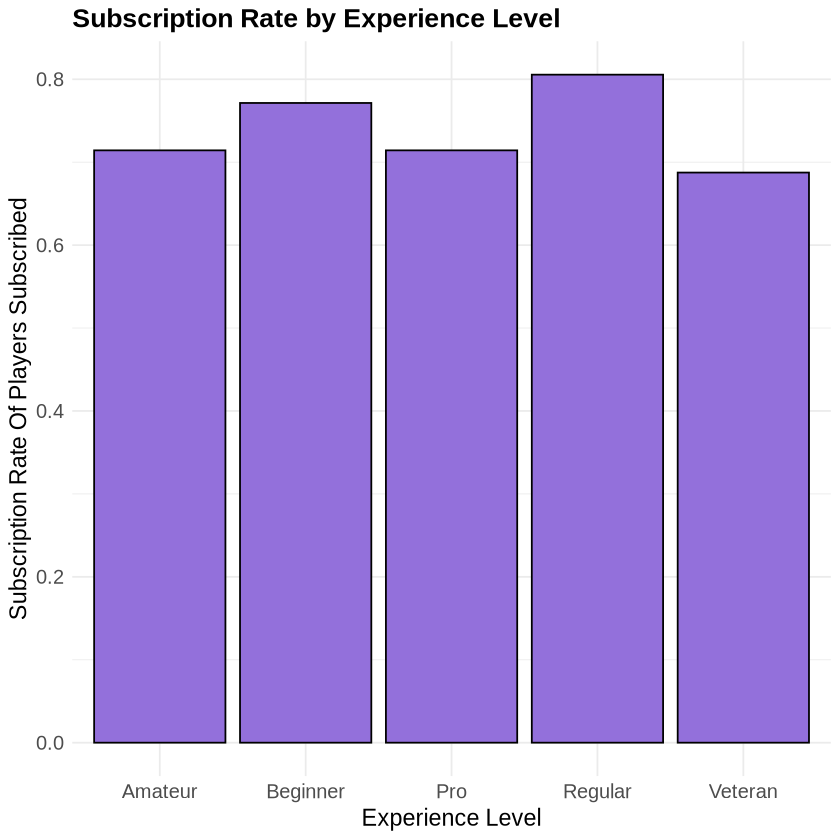

In [72]:
experience_subscription_rate_plot <- ggplot(subscription_rate, aes(x = experience, y = subscription_rate)) +
      geom_bar(stat = "identity", fill = "#9370DB", color = "black") +
      labs(title = "Subscription Rate by Experience Level",
           x = "Experience Level",
           y = "Subscription Rate Of Players Subscribed") +
      theme_minimal() + 
      theme(plot.title = element_text(size = 16, face = "bold"),
            axis.title = element_text(size = 14),
            axis.text = element_text(size = 12))

experience_subscription_rate_plot

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


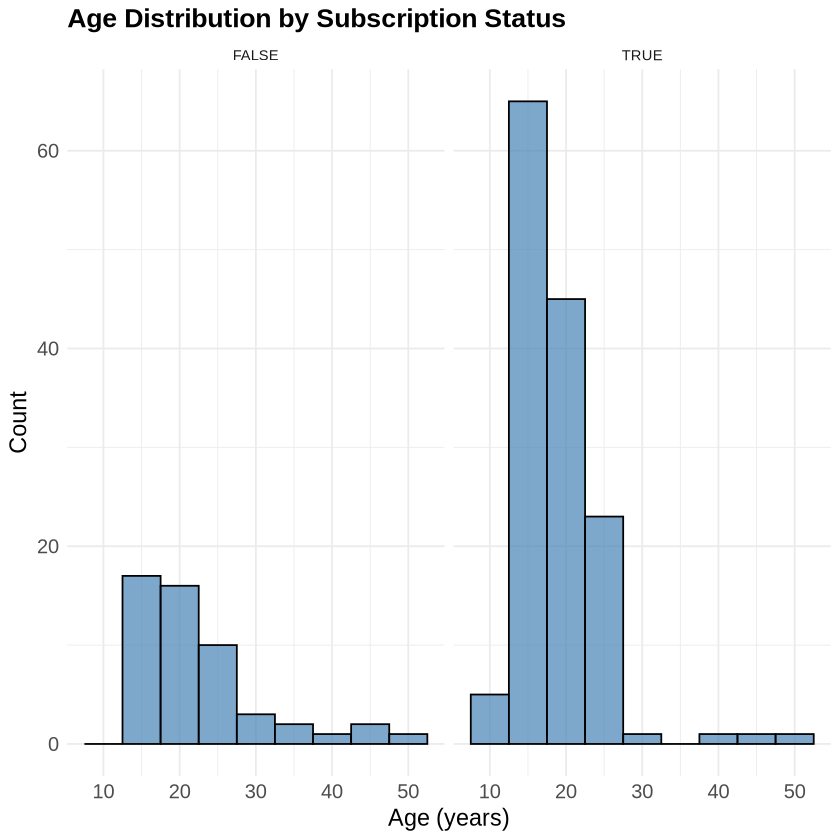

In [73]:
age_subscription_rate_plot <- players|>
    ggplot(aes(x = Age)) +
    geom_histogram(binwidth = 5, fill = "steelblue", color = "black", alpha = 0.7) +
  facet_wrap(~ subscribe) +
  labs(title = "Age Distribution by Subscription Status",
       x = "Age (years)",
       y = "Count") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

age_subscription_rate_plot

## Data Analysis

The age distribution by subscription plot shows the distribution of subscriptions by Age. From the plot we can see in the age range 15-25 there are far more players subscribed which imply that age could be a strong predictor for that specific range.

The subcription rate by experience plot shows subscription rate based on experience level of the player. The plot shows that Beginner and regular players are subscribed more often that not in comparison to pro and veteran players.

# Methods and Planning

To predict the wether a player is subscribed we can use a linear regression algorithm. Since linear regression assumes each predictor will contribute differently to our prediction, it will allow us to quantify how much each predictor will contribute to our subscription status.

Linear regression has its limitations such as predicting values outside of the 0-1 range (true or false),
and being sensitive to outliers.

To maximize our model performance and reliability we will split our data into (70%) training and (30%) testing, and also use a 5-fold cross-validation on the training set after we clean the data to ensure that our model generalizes well. We will compare models using mean square error .